# **Titanic DataSet**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId', 'Fare']

In [ ]:
df = df.drop(columns_to_drop, axis=1)

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


# **Exploratory Data Analysis**

In [ ]:
sns.set(style="whitegrid")
sns.set_context("paper", rc={"font.size": 18})
custom_palette = sns.color_palette("Set1")

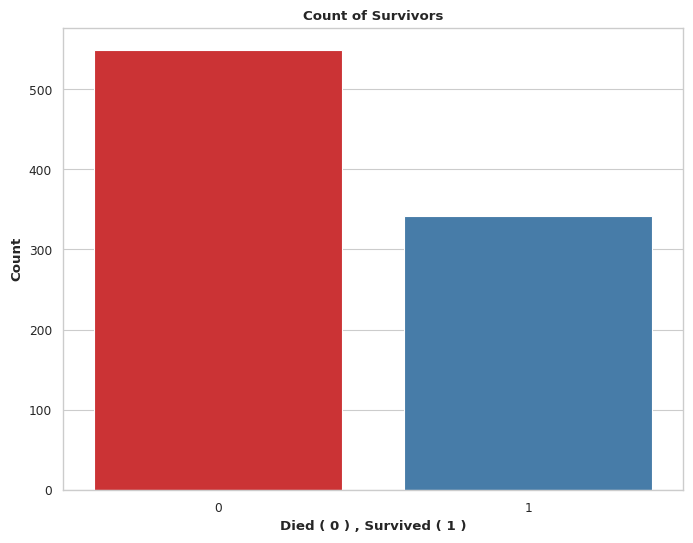

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_palette(custom_palette)
sns.countplot(x='Survived', data=df)
plt.title('Count of Survivors', fontweight='bold')
plt.xlabel('Died ( 0 ) , Survived ( 1 )', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

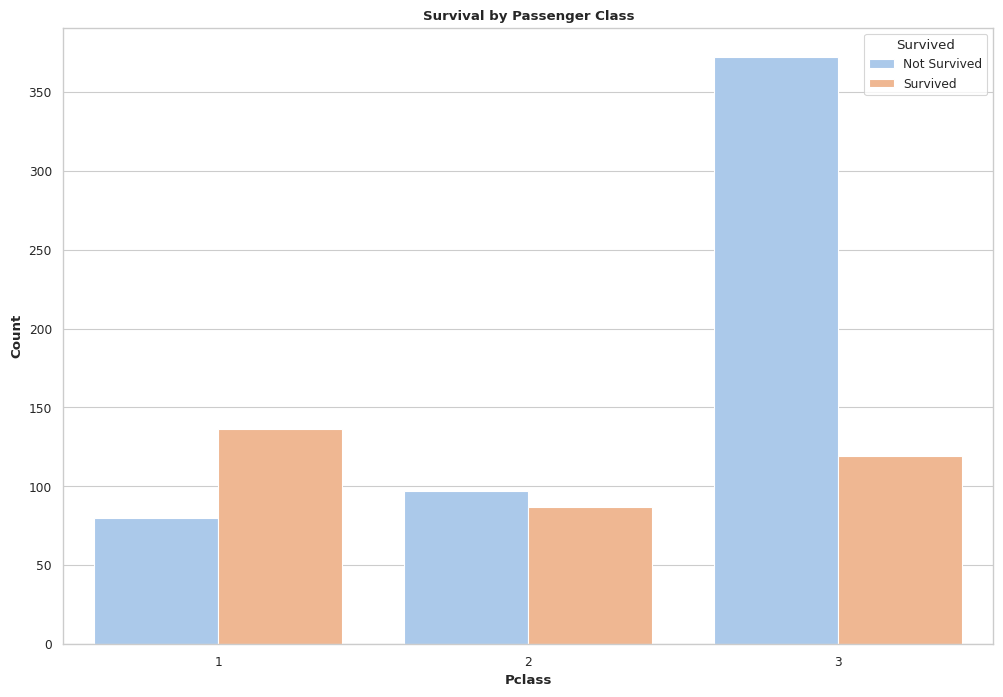

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_palette("Set1")
sns.countplot(x='Pclass', hue='Survived', data=df, palette="pastel")
plt.title('Survival by Passenger Class', fontweight='bold')
plt.xlabel('Pclass', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title="Survived", labels=["Not Survived", "Survived"], loc="upper right")
plt.show()

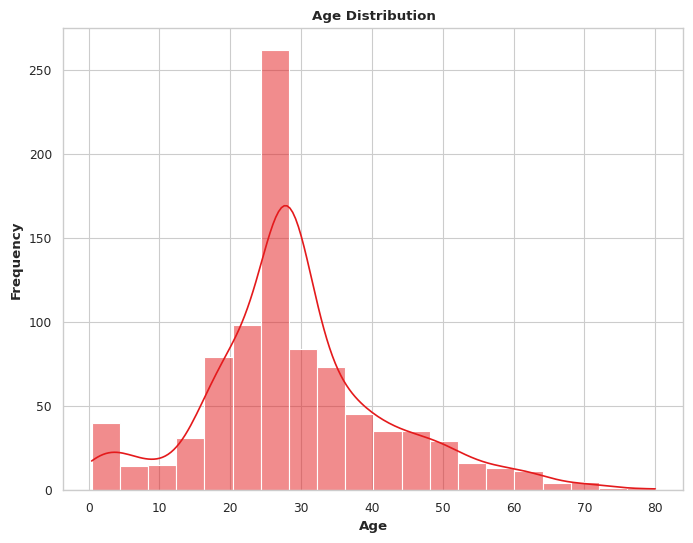

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_palette(custom_palette)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()

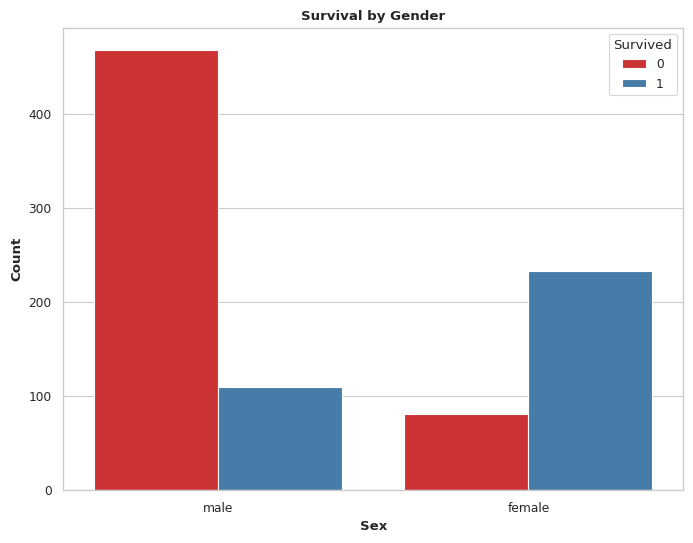

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_palette(custom_palette)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender', fontweight='bold')
plt.xlabel('Sex', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

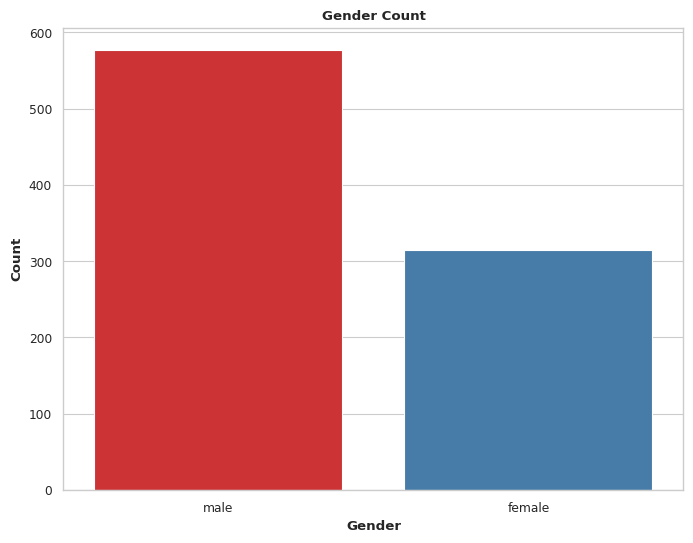

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
sns.countplot(x='Sex', data=df)
plt.title('Gender Count', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

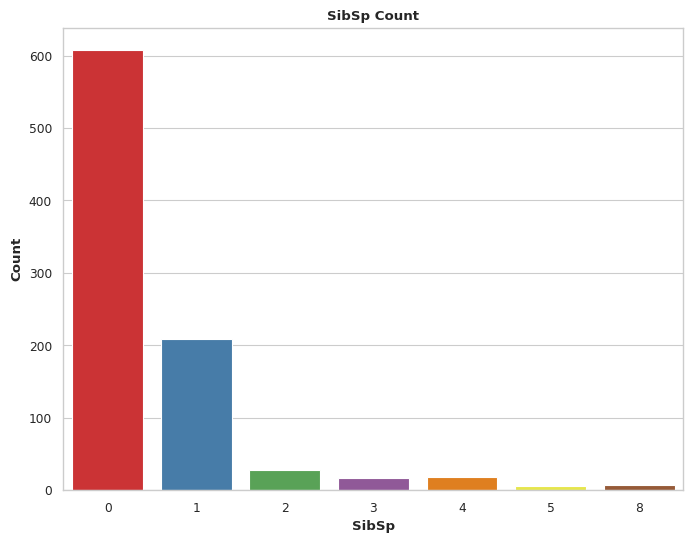

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_palette(custom_palette)
sns.countplot(x='SibSp', data=df)
plt.title('SibSp Count', fontweight='bold')
plt.xlabel('SibSp', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

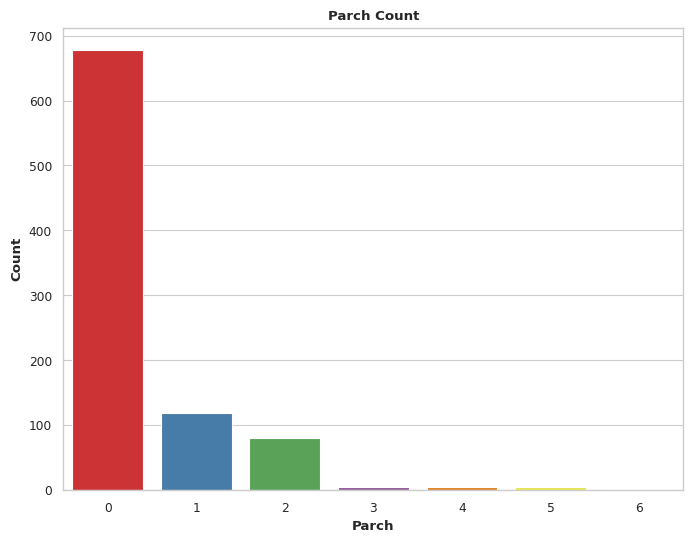

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_palette(custom_palette)
sns.countplot(x='Parch', data=df)
plt.title('Parch Count', fontweight='bold')
plt.xlabel('Parch', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

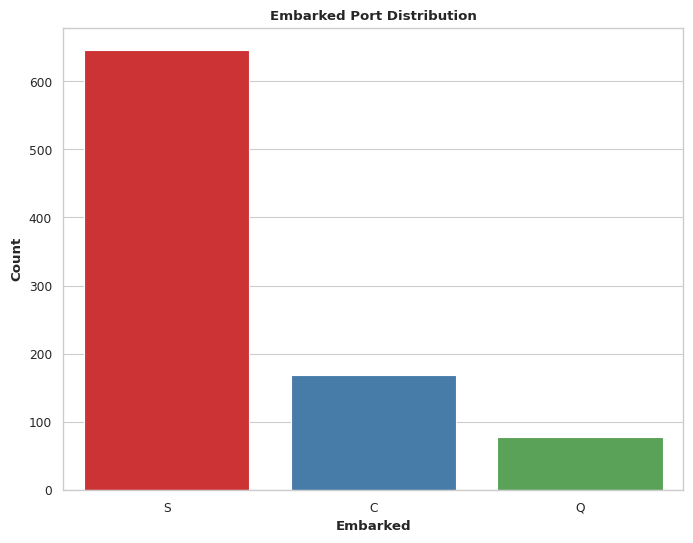

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_palette(custom_palette)
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Port Distribution', fontweight='bold')
plt.xlabel('Embarked', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

# **Applying ML Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Survived']
df = df[selected_features]

In [ ]:
X = df.drop('Survived', axis=1)

In [ ]:
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [105]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [106]:
y_pred = clf.predict(X_test)

In [107]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.82
Confusion Matrix:
[[93 12]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

